**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
train=pd.read_csv(r"/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Pre-processing**

In [4]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
train.shape

(891, 12)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the cabin column has more than 80% null values, it can be dropped

In [7]:
train.drop("Cabin",axis=1,inplace=True)

In [8]:
train.drop('Fare',axis=1,inplace=True)

Since the age column dosent have a lot of null values, they can be replaced with median of the values of the column

In [9]:
train['Age']=train.fillna(train.Age.median())

**Exploratory Data Analysis**

In [10]:
train.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

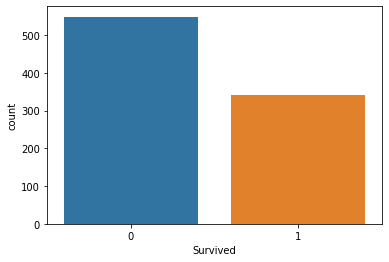

In [11]:
sns.countplot(x="Survived",data=train)

Out of the 891 passengers, we can observe that more than 530 of them have lost their lives.

<AxesSubplot:xlabel='Survived', ylabel='count'>

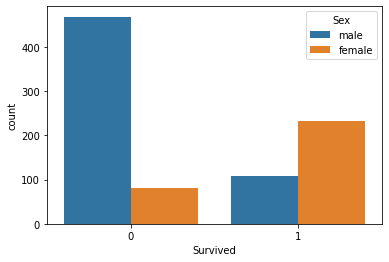

In [12]:
sns.countplot(x="Survived",hue="Sex",data=train)

Quite clearly, more number of females have survived the tragedy.

<AxesSubplot:xlabel='Survived', ylabel='count'>

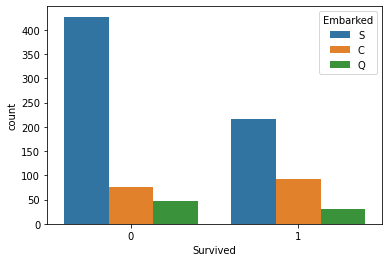

In [13]:
sns.countplot(x="Survived",hue="Embarked",data=train)

We can observe that out of the 350 survivors,almost 210 survivors have Embarked in Southampton with Queensland having the least survivors.

<AxesSubplot:xlabel='Survived', ylabel='count'>

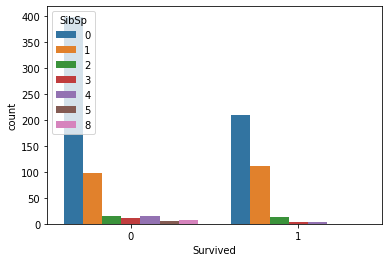

In [14]:
sns.countplot(x="Survived",hue="SibSp",data=train)

**One-Hot Encoding** (for converting categorical columns into numerical)

In [15]:
sex=pd.get_dummies(train["Sex"])
embarked=pd.get_dummies(train["Embarked"])

In [16]:
train=pd.concat([train,sex,embarked],axis=1)
train.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,1,0,3,1,1,0,0,1,0,0,1
1,2,1,1,2,1,0,1,0,1,0,0
2,3,1,3,3,0,0,1,0,0,0,1
3,4,1,1,4,1,0,1,0,0,0,1
4,5,0,3,5,0,0,0,1,0,0,1


**Introducing the test data set**

In [17]:
test=pd.read_csv(r"/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Observing the null values and taking proper action against them

In [18]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since, Cabin has most of the values as null, it can be removed from the dataset

In [19]:
test.drop('Cabin',axis=1,inplace=True)

Since the age column dosent have a lot of null values, they can be replaced with median of the values of the column

In [20]:
test['Age']=test.fillna(test.Age.median())

<AxesSubplot:>

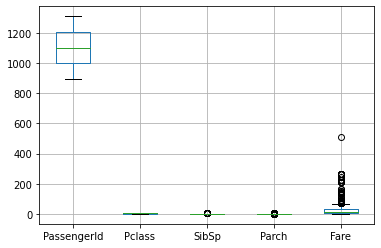

In [21]:
test.boxplot()

<AxesSubplot:>

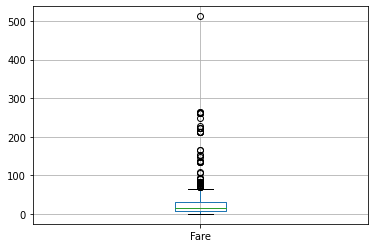

In [22]:
test.boxplot(column=['Fare'])

Since many values in the Fare column lie utside the interquartile range, it can be ignored as well

In [23]:
test.drop('Fare',axis=1,inplace=True)

**One-Hot Encoding** (for converting categorical columns into numerical)

In [24]:
sex=pd.get_dummies(test["Sex"])
embarked=pd.get_dummies(test["Embarked"])

In [25]:
test=pd.concat([test,sex,embarked],axis=1)
test.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,892,3,892,0,0,0,1,0,1,0
1,893,3,893,1,0,1,0,0,0,1
2,894,2,894,0,0,0,1,0,1,0
3,895,3,895,0,0,0,1,0,0,1
4,896,3,896,1,1,1,0,0,0,1


**Splitting the data into train and test** 

In [26]:
x_train,x_test,y_train,y_test=train_test_split(train.drop("Survived",axis=1),train['Survived'],test_size=0.2,random_state=0)

In [27]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

**Logistic Regression**

In [28]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
predict=classifier.predict(x_test)

In [30]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.7988826815642458

**Random Forest**

In [31]:
rf_classifier = RandomForestClassifier(criterion="gini",max_depth=None,min_samples_leaf=1,random_state=10)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [32]:
pred3 = rf_classifier.predict(x_test)

In [33]:
accuracy_rf=accuracy_score(y_test,pred3)
accuracy_rf

0.7932960893854749

**Decision Trees**

In [34]:
decision_classifier=DecisionTreeClassifier(criterion="gini",max_depth=None,min_samples_leaf=1,random_state=7)
decision_classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=7)

In [35]:
pred2=decision_classifier.predict(x_test)


In [36]:
accuracy_dt=accuracy_score(y_test,pred2)
accuracy_dt

0.7039106145251397

**In the above three classification models, since Logisitic Regression had the highest accuracy compared to the others, we would be proceeding with the same.**

In [37]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,892,3,892,0,0,0,1,0,1,0
1,893,3,893,1,0,1,0,0,0,1
2,894,2,894,0,0,0,1,0,1,0
3,895,3,895,0,0,0,1,0,0,1
4,896,3,896,1,1,1,0,0,0,1


In [38]:
final=classifier.predict(test)
final

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
test['Survived'] = final
test.drop(['Pclass','Age','SibSp','Parch','female','male','C','Q','S'],inplace=True,axis=1)
test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
submission_analysis = pd.DataFrame(test, columns = ['PassengerId', 'Survived'])
submission_analysis.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
submission_analysis.to_csv('titanic_data_submission.csv', index=False)